In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv(r'train.csv')
store = pd.read_csv(r'store.csv')

C:\Users\aparajita singh\AppData\Local\Temp\ipykernel_3824\159027317.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'train.csv')


In [6]:
train = train.merge(store, on='Store', how='left')
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
train.shape

(1017209, 18)

In [8]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
train['Sales'].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6049        195
          ...  
23861         1
22756         1
24520         1
24144         1
24287         1
Name: count, Length: 21734, dtype: int64

In [11]:
train_df = train[train['Sales'] > 0].copy()

In [12]:
print("Shape : ", train_df.shape)

Shape :  (844338, 18)


In [13]:
print("Info : ", train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        842152 non-null  float64
 12  CompetitionOpenSinceMonth  575738 non-null  float64
 13  CompetitionOpenSinceYear   575738

In [14]:
print("Describe : ", train_df.describe(), sep = '\n')

Describe : 
               Store      DayOfWeek          Sales      Customers      Open  \
count  844338.000000  844338.000000  844338.000000  844338.000000  844338.0   
mean      558.421374       3.520350    6955.959134     762.777166       1.0   
std       321.730861       1.723712    3103.815515     401.194153       0.0   
min         1.000000       1.000000      46.000000       8.000000       1.0   
25%       280.000000       2.000000    4859.000000     519.000000       1.0   
50%       558.000000       3.000000    6369.000000     676.000000       1.0   
75%       837.000000       5.000000    8360.000000     893.000000       1.0   
max      1115.000000       7.000000   41551.000000    7388.000000       1.0   

               Promo  SchoolHoliday  CompetitionDistance  \
count  844338.000000  844338.000000        842152.000000   
mean        0.446356       0.193578          5458.156627   
std         0.497114       0.395102          7809.573181   
min         0.000000       0.000000 

In [15]:
train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = train_df.drop('Sales', axis = 1)
y = train_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [18]:
comp_dist_median = X_train['CompetitionDistance'].median()

X_train['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
X_train['CompetitionOpenSinceYear'].fillna(0, inplace=True)
X_train['Promo2SinceWeek'].fillna(0, inplace=True)
X_train['Promo2SinceYear'].fillna(0, inplace=True)
X_train['PromoInterval'].fillna('None', inplace=True)
X_train['CompetitionDistance'].fillna(comp_dist_median, inplace=True)

X_test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
X_test['CompetitionOpenSinceYear'].fillna(0, inplace=True)
X_test['Promo2SinceWeek'].fillna(0, inplace=True)
X_test['Promo2SinceYear'].fillna(0, inplace=True)
X_test['PromoInterval'].fillna('None', inplace=True)
X_test['CompetitionDistance'].fillna(comp_dist_median, inplace=True)

C:\Users\aparajita singh\AppData\Local\Temp\ipykernel_3824\1310682939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
C:\Users\aparajita singh\AppData\Local\Temp\ipykernel_3824\1310682939.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [19]:
X_train.sample(n=10)

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
124757,993,6,2015-04-11,486,1,0,0,0,d,c,3460.0,10.0,2013.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
526193,699,1,2014-03-17,1172,1,1,0,0,a,a,180.0,0.0,0.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
555887,288,2,2014-02-18,459,1,1,0,0,d,a,800.0,0.0,0.0,1,14.0,2011.0,"Mar,Jun,Sept,Dec"
486267,913,2,2014-04-22,1111,1,0,0,1,a,a,280.0,0.0,0.0,0,0.0,0.0,None
123844,80,6,2015-04-11,733,1,0,0,0,d,a,7910.0,0.0,0.0,0,0.0,0.0,None
327904,991,4,2014-09-25,432,1,0,0,0,a,a,1010.0,0.0,0.0,0,0.0,0.0,None
501282,318,2,2014-04-08,460,1,0,0,0,d,c,32330.0,3.0,2014.0,0,0.0,0.0,None
929250,126,3,2013-03-20,491,1,1,0,0,d,a,3370.0,10.0,2014.0,1,18.0,2011.0,"Feb,May,Aug,Nov"
955239,470,1,2013-02-25,1341,1,0,0,0,a,c,50.0,0.0,0.0,0,0.0,0.0,None
202213,399,6,2015-01-31,571,1,0,0,0,a,a,5360.0,9.0,2012.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


Text(0, 0.5, 'Frequency')

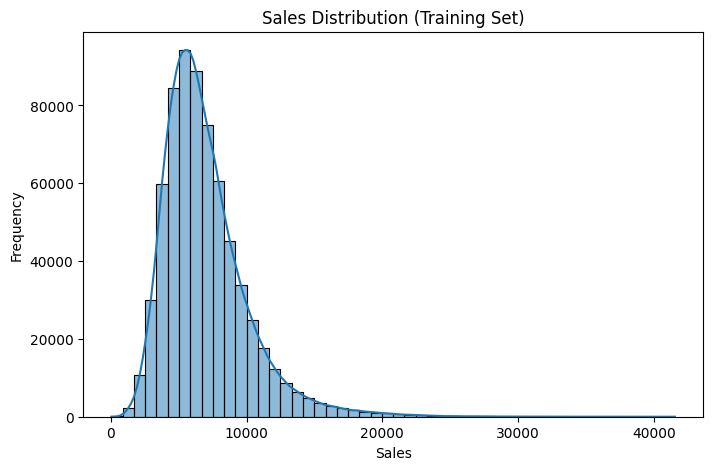

In [20]:
plt.figure(figsize=(8, 5))

sns.histplot(y_train, bins=50, kde=True)
plt.title('Sales Distribution (Training Set)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

In [21]:
y_train.describe()

count    675470.000000
mean       6955.274202
std        3103.174911
min          46.000000
25%        4858.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

Text(0, 0.5, 'Average Sales')

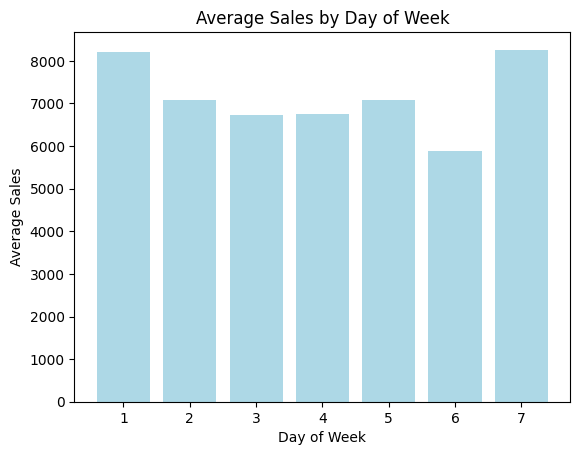

In [22]:
dow_sales = X_train.join(y_train).groupby('DayOfWeek')['Sales'].mean()
bars = plt.bar(dow_sales.index, dow_sales.values, color='lightblue')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')

Text(0, 0.5, 'Average Sales')

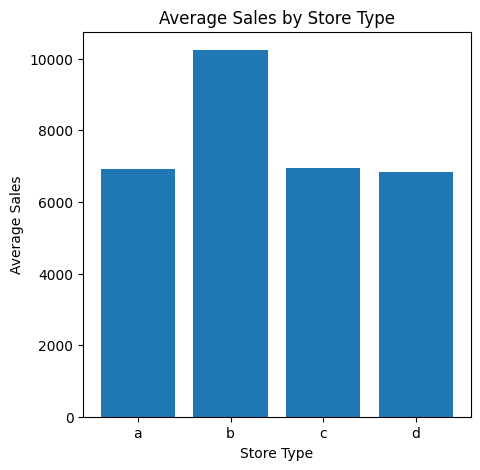

In [23]:
plt.figure(figsize = (5,5))
store_type_sales = X_train.join(y_train).groupby('StoreType')['Sales'].mean()
bars = plt.bar(store_type_sales.index, store_type_sales.values)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

In [24]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day
X_train['WeekOfYear'] = X_train['Date'].dt.isocalendar().week    

X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day
X_test['WeekOfYear'] = X_test['Date'].dt.isocalendar().week    

In [25]:
X_train.drop('Date', inplace = True, axis = 1)
X_test.drop('Date', inplace = True, axis = 1)

In [26]:
X_train.sample(n=10)

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
884207,798,2,1248,1,1,0,0,a,a,9560.0,4.0,2001.0,0,0.0,0.0,None,2013,4,30,18
254258,138,5,820,1,0,0,0,a,c,25360.0,10.0,2014.0,0,0.0,0.0,None,2014,12,12,50
302357,630,3,611,1,1,0,0,a,a,1690.0,4.0,2015.0,0,0.0,0.0,None,2014,10,22,43
2373,144,3,796,1,1,0,0,a,c,16570.0,0.0,0.0,0,0.0,0.0,None,2015,7,29,31
1009345,1056,2,245,1,1,0,0,d,c,5350.0,0.0,0.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,8,2
12328,64,1,787,1,0,0,1,d,c,22560.0,0.0,0.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,20,30
664858,1104,3,330,1,0,0,0,d,a,260.0,2.0,2012.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,11,13,46
933691,107,6,829,1,0,0,0,a,a,1930.0,9.0,2009.0,0,0.0,0.0,None,2013,3,16,11
663396,757,4,434,1,0,0,0,a,c,3450.0,0.0,0.0,0,0.0,0.0,None,2013,11,14,46
840686,762,6,371,1,0,0,0,d,c,1280.0,0.0,0.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec",2013,6,8,23


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675470 entries, 371109 to 148740
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      675470 non-null  int64  
 1   DayOfWeek                  675470 non-null  int64  
 2   Customers                  675470 non-null  int64  
 3   Open                       675470 non-null  int64  
 4   Promo                      675470 non-null  int64  
 5   StateHoliday               675470 non-null  object 
 6   SchoolHoliday              675470 non-null  int64  
 7   StoreType                  675470 non-null  object 
 8   Assortment                 675470 non-null  object 
 9   CompetitionDistance        675470 non-null  float64
 10  CompetitionOpenSinceMonth  675470 non-null  float64
 11  CompetitionOpenSinceYear   675470 non-null  float64
 12  Promo2                     675470 non-null  int64  
 13  Promo2SinceWeek            67

In [28]:
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [29]:
X_train.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
371109,106,6,515,1,0,0,1390.0,8.0,2013.0,0,...,False,False,False,False,False,False,False,False,False,True
38253,344,6,1054,1,0,0,300.0,4.0,2011.0,1,...,False,False,False,False,False,False,True,True,False,False
705238,229,1,915,1,1,1,17410.0,4.0,2007.0,1,...,False,False,False,False,True,False,True,True,False,False
271492,617,1,758,1,1,0,8940.0,0.0,0.0,1,...,False,False,False,False,False,False,True,True,False,False
689332,1048,2,525,1,1,0,1860.0,9.0,2012.0,1,...,False,False,False,False,True,False,True,True,False,False


In [30]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None'],
      dtype='object')

<Axes: >

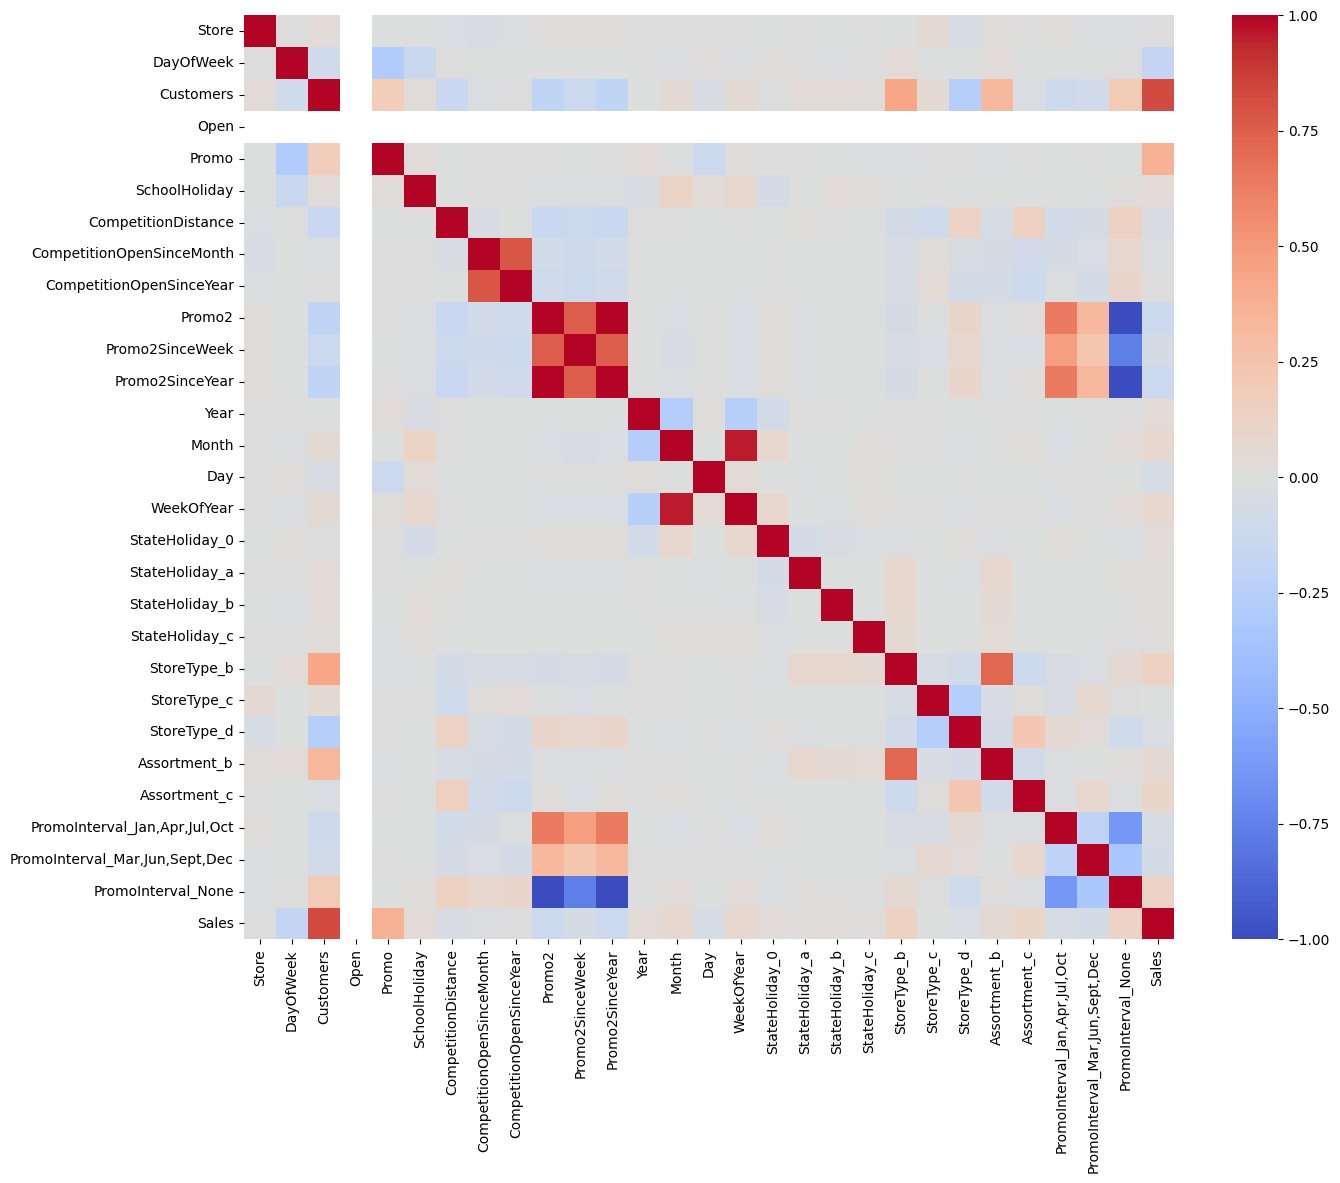

In [31]:
full_data = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(15, 12))
sns.heatmap(full_data.corr(), cmap="coolwarm")

In [32]:
X_train = X_train.drop(['Open'] , axis =1 )
X_test = X_test.drop(['Open'] , axis = 1)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error, r2_score

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("RMSE = " , root_mean_squared_error(y_test, y_pred_lr))
print("R2_score = " , r2_score(y_test , y_pred_lr))

Linear Regression
RMSE =  1294.2539846890695
R2_score =  0.8264073908399109


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted (RMSE :  1294.254)')

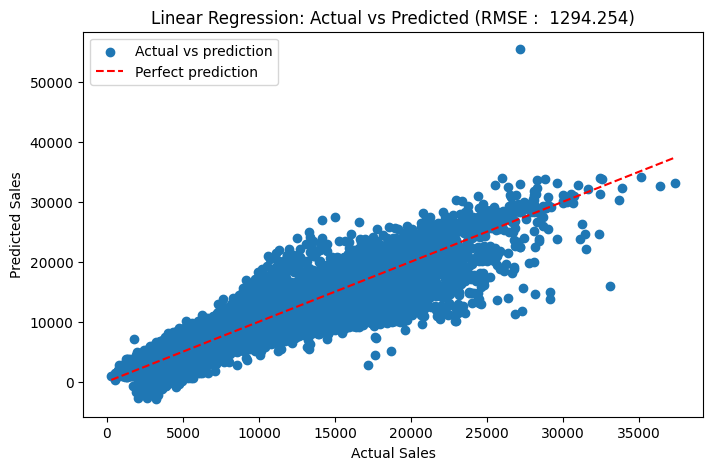

In [35]:
plt.figure(figsize = (8,5))
plt.scatter(y_test , y_pred_lr , label = 'Actual vs prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , label = 'Perfect prediction')
plt.legend()
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Linear Regression: Actual vs Predicted (RMSE : {root_mean_squared_error(y_test , y_pred_lr) : .3f})")


In [36]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge")
print("RMSE :", root_mean_squared_error(y_pred_ridge, y_test))

Ridge
RMSE : 1295.0116219882768


Text(0.5, 1.0, 'Ridge: Actual vs Predicted (RMSE :  1295.012)')

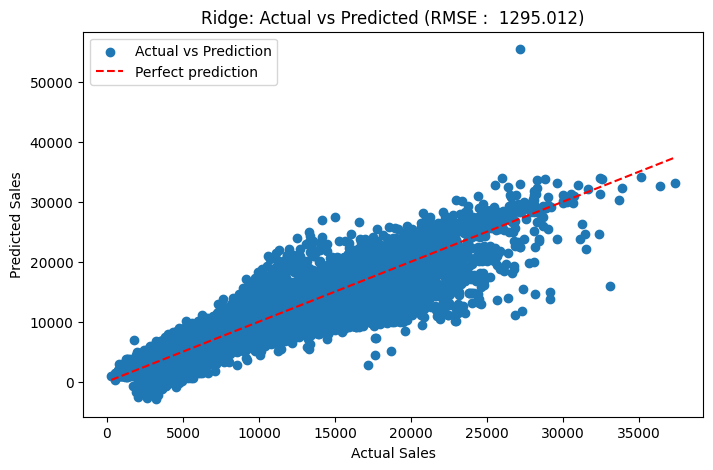

In [37]:
plt.figure(figsize = (8,5))
plt.scatter(y_test , y_pred_ridge , label = 'Actual vs Prediction')
plt.plot([y_test.min(), y_test.max()] , [y_test.min() , y_test.max()] , 'r--' , label = 'Perfect prediction')
plt.legend()
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Ridge: Actual vs Predicted (RMSE : {root_mean_squared_error(y_test , y_pred_ridge) : .3f})")

In [38]:
lasso = Lasso()
lasso.fit(X_train , y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso")
print("RMSE : " , root_mean_squared_error(y_pred_lasso, y_test))

Lasso
RMSE :  1295.9360230023483


Text(0.5, 1.0, 'Lasso : Actual vs Predicted (RMSE :  1295.936)')

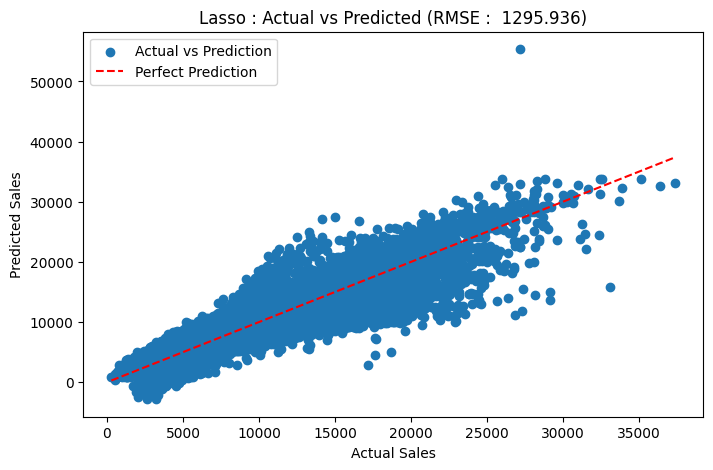

In [39]:
plt.figure(figsize = (8,5))
plt.scatter(y_test , y_pred_lasso , label = 'Actual vs Prediction')
plt.plot([y_test.min() , y_test.max()] , [y_test.min() , y_test.max()] , 'r--' , label = 'Perfect Prediction')
plt.legend()
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Lasso : Actual vs Predicted (RMSE : {root_mean_squared_error(y_test , y_pred_lasso) : .3f})")